**รายชื่อสมาชิก** 

1. นางสาวณัฐชา สุภาพจันทร์ 6209050040 

2. นางสาวสุพิชชา จำปาทอง 62090500424 

3. นายสหัสวรรษ ประคอง 62090500440 

4. นายนพคุณ อนันตกิจถาวร 62090500447 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import datetime


import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


In [2]:
aSales = pd.read_csv('../input/Asales.csv')
bSales = pd.read_csv('../input/Bsales.csv')
covid19 = pd.read_csv('../input/covid-19.csv')
item_cat = pd.read_csv('../input/item_categories.csv')
items = pd.read_csv('../input/items.csv')
shops = pd.read_csv('../input/shops.csv')

<h1>Part 1<h1>

<h2>1. หาการเปลี่ยนแปลงของจำนวนผู้ป่วยในระยะสองสัปดาห์ล่าสุดว่าขึ้นลงกี่ % แสดงค่าและชื่อประเทศนั้นๆ จำนวนสูงสุด 10 ประเทศ ละลดลงมากสุด 10 ปนะเทศ </h2>


เปลี่ยนคอลัมน์ date ให้กลายเป็น datetimeแล้ว หาวันที่ ล่าสุด, 2 อาทิตย์ที่แล้ว และ 4 อาทิตย์ที่แล้ว

In [3]:
df = covid19
df['date'] = pd.to_datetime(covid19['date'], format='%Y-%m-%d')
today_date = df.iloc[-1]['date']
two_weeks = today_date-datetime.timedelta(days=14)
four_weeks = two_weeks-datetime.timedelta(days=14)

กรองข้อมูล 2 อาทิตย์แรกมาเก็บไว้

In [4]:
mask = (df['date'] > two_weeks) & (df['date'] <= today_date)
first_fortnight = df.loc[mask]
first_fortnight = first_fortnight.groupby('location').sum()
first_fortnight = first_fortnight.reset_index()
first_fortnight

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,2.166004e+06,913.0,973.999,100709.0,30.0,35.714,54373.812,22.920,24.449,...,0.000,0.00,528.444,7.00,907.62,7.154,0.0,0.0,0.0,0.0
1,Africa,1.146218e+08,174385.0,200680.716,2898774.0,5674.0,6011.998,83453.182,126.965,146.111,...,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
2,Albania,2.303785e+06,10351.0,11126.427,36443.0,115.0,91.713,801892.769,3602.936,3872.846,...,99.400,716.80,0.000,40.46,1099.98,11.130,0.0,0.0,0.0,0.0
3,Algeria,2.827794e+06,2517.0,2793.714,80132.0,183.0,211.284,63379.829,56.414,62.616,...,9.800,425.60,1172.374,26.60,1076.32,10.472,0.0,0.0,0.0,0.0
4,Andorra,2.120640e+05,93.0,85.573,1820.0,0.0,0.000,2741474.260,1202.265,1106.231,...,406.000,529.20,0.000,0.00,1172.22,12.152,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Wallis and Futuna,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.00,0.000,0.00,1119.16,0.000,0.0,0.0,0.0,0.0
218,World,3.216923e+09,6863036.0,7135751.858,65998324.0,115467.0,118472.856,408499.920,871.500,906.131,...,90.076,484.89,841.820,37.87,1016.12,10.318,0.0,0.0,0.0,0.0
219,Yemen,1.227530e+05,514.0,540.001,23226.0,101.0,109.572,4025.925,16.857,17.711,...,106.400,408.80,693.588,9.80,925.68,6.580,0.0,0.0,0.0,0.0
220,Zambia,2.920407e+06,863.0,1021.856,50970.0,12.0,15.428,154350.189,45.611,54.008,...,43.400,345.80,195.132,28.00,894.46,8.176,0.0,0.0,0.0,0.0


หาข้อมูลของผู้ป่วยจากวันที่ 14 ถึง 28 และทำให้ค่าnew_casesไม่เป็น0

In [5]:
mask = (df['date'] > four_weeks) & (df['date'] <= two_weeks)
second_fortnight = df.loc[mask]
second_fortnight = second_fortnight.groupby('location').sum()
second_fortnight = second_fortnight.reset_index()
second_fortnight[second_fortnight.new_cases <= 0] = 0
second_fortnight

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,2.151703e+06,960.0,981.715,100068.0,53.0,59.427,54014.808,24.100,24.643,...,0.000,0.00,528.444,7.00,907.62,7.154,0.0,0.0,0.0,0.0
1,Africa,1.114422e+08,292059.0,313787.998,2808572.0,7646.0,8368.570,81138.193,212.642,228.462,...,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
2,Albania,2.141526e+06,12044.0,12077.713,35360.0,55.0,49.428,745414.269,4192.228,4203.965,...,99.400,716.80,0.000,40.46,1099.98,11.130,0.0,0.0,0.0,0.0
3,Algeria,2.781887e+06,4448.0,5142.572,76642.0,345.0,375.857,62350.904,99.694,115.262,...,9.800,425.60,1172.374,26.60,1076.32,10.472,0.0,0.0,0.0,0.0
4,Andorra,2.109940e+05,66.0,60.287,1820.0,0.0,0.000,2727641.751,853.222,779.348,...,406.000,529.20,0.000,0.00,1172.22,12.152,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
221,World,3.112797e+09,8088393.0,8336352.285,64298254.0,129604.0,130527.569,395277.578,1027.101,1058.590,...,90.076,484.89,841.820,37.87,1016.12,10.318,0.0,0.0,0.0,0.0
222,Yemen,1.148850e+05,633.0,612.000,21601.0,136.0,119.284,3767.879,20.759,20.070,...,106.400,408.80,693.588,9.80,925.68,6.580,0.0,0.0,0.0,0.0
223,Zambia,2.903195e+06,1722.0,1991.286,50690.0,33.0,35.858,153440.498,91.012,105.243,...,43.400,345.80,195.132,28.00,894.46,8.176,0.0,0.0,0.0,0.0


In [6]:
frames = [second_fortnight, first_fortnight ]
result = pd.concat(frames)
result

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,2.151703e+06,960.0,981.715,100068.0,53.0,59.427,54014.808,24.100,24.643,...,0.000,0.00,528.444,7.00,907.62,7.154,0.0,0.0,0.0,0.0
1,Africa,1.114422e+08,292059.0,313787.998,2808572.0,7646.0,8368.570,81138.193,212.642,228.462,...,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
2,Albania,2.141526e+06,12044.0,12077.713,35360.0,55.0,49.428,745414.269,4192.228,4203.965,...,99.400,716.80,0.000,40.46,1099.98,11.130,0.0,0.0,0.0,0.0
3,Algeria,2.781887e+06,4448.0,5142.572,76642.0,345.0,375.857,62350.904,99.694,115.262,...,9.800,425.60,1172.374,26.60,1076.32,10.472,0.0,0.0,0.0,0.0
4,Andorra,2.109940e+05,66.0,60.287,1820.0,0.0,0.000,2727641.751,853.222,779.348,...,406.000,529.20,0.000,0.00,1172.22,12.152,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Wallis and Futuna,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.00,0.000,0.00,1119.16,0.000,0.0,0.0,0.0,0.0
218,World,3.216923e+09,6863036.0,7135751.858,65998324.0,115467.0,118472.856,408499.920,871.500,906.131,...,90.076,484.89,841.820,37.87,1016.12,10.318,0.0,0.0,0.0,0.0
219,Yemen,1.227530e+05,514.0,540.001,23226.0,101.0,109.572,4025.925,16.857,17.711,...,106.400,408.80,693.588,9.80,925.68,6.580,0.0,0.0,0.0,0.0
220,Zambia,2.920407e+06,863.0,1021.856,50970.0,12.0,15.428,154350.189,45.611,54.008,...,43.400,345.80,195.132,28.00,894.46,8.176,0.0,0.0,0.0,0.0


หาค่าความแตกต่างระหว่างสองช่วงแล้วลบบรรทัดที่ไม่ได้ใช้แล้ว

In [7]:
result['difference'] = result.groupby('location')['new_cases'].pct_change()
result = result.dropna(subset=['difference'])
result[['location', 'difference']]

,location,difference
0,Afghanistan,-0.048958
1,Africa,-0.402912
2,Albania,-0.140568
3,Algeria,-0.434128
4,Andorra,0.409091
...,...,...
216,Vietnam,-0.216086
218,World,-0.151496
219,Yemen,-0.187994
220,Zambia,-0.498839


จะเห็นได้ว่า 10 ประเทศที่มีผู้ป่วยเพิ่มมากที่สุด คือ Djibouti, Congo, Central African Republic, Saint Vincent and the Grenadines, Singapore, Romania, Gabon, Slovakia, Ukraine และ Syria

In [8]:
result[['location','difference']].nlargest(10, 'difference')

,location,difference
55,Djibouti,4.027211
45,Congo,3.805310
39,Central African Republic,3.769231
169,Saint Vincent and the Grenadines,3.583784
178,Singapore,2.383052
164,Romania,2.027933
73,Gabon,1.573399
180,Slovakia,1.422119
207,Ukraine,1.167143
194,Syria,1.029101


จะเห็นได้ว่า 10 ประเทศที่มีจำนวนผู้ป่วยลดลงมากที่สุดคือ Madagascar, Tajikistan, Kosovo, Benin, Japan, Guinea-Bissau, Tunisia, Monaco, Senegal และ Mozambique

In [9]:
result[['location','difference']].nsmallest(10, 'difference')

,location,difference
121,Madagascar,-1.000000
196,Tajikistan,-1.000000
108,Kosovo,-0.814519
22,Benin,-0.813459
102,Japan,-0.712126
85,Guinea-Bissau,-0.689655
203,Tunisia,-0.679077
133,Monaco,-0.662651
174,Senegal,-0.655367
138,Mozambique,-0.654867


<h2>ข้อ 2 จำนวนผู้ป่วยใหม่รายวันของแต่ละประเทศโดยเริ่มตั้งแต่วันที่ Mar 1, 2020 ให้เลือกรายชื่อประเทศที่ต้องการ และวันเริ่มต้นได้โดยใส่ไว้ต้นของโค้ด Cell นั้น<h2>

location list ที่เก็บประเทศทั้งหมดในชุดข้อมูลโควิด19 เพื่อนำมาทำ dropdow เพื่อให้เลือกดูกราฟแต่ละประเทศได้ และเวลาที่เริ่มต้นได้ โดยต้องใช้ Library @interact โดยก่อนจะใช้ต้องมีการ import ipywidgets มีการกำหนดรูปแบบของกราฟ และกราฟจะโชว์จำนวนผู้ป่วยรายใหม่ที่เพิ่มขึ้น หรือลดลงของประเทศนั้นๆ เริ่มต้นจากวันที่ 1 มีนาคม 2020 ที่ได้มีการโชว์กราฟแต่ละประเทศดังต่อไปนี้

In [10]:
location_list = covid19['location']
location_list = location_list.drop_duplicates()
sdate= pd.to_datetime('2020-3-1', format='%Y-%m-%d', errors='ignore').date()
edate = covid19.iloc[-1]['date']
date = pd.date_range(sdate,edate,freq='d')


@interact(location=location_list, date=date)
def plot_chart(location, date):
    df=covid19[covid19['location'].isin([location])]
    df.dropna(subset=['new_cases'])
    df['date'] = pd.to_datetime(covid19['date'], format='%Y-%m-%d')
    res = df[~(df['date'] < date)]
    sdate = date
    edate = covid19.iloc[-1]['date']
    fig, ax = plt.subplots(figsize=(13, 6))
    sns.lineplot(data=res, x=res['date'], y='new_cases', ax=ax )
    #ax.grid()
    plt.title(f'COVID-19 in {location}')

interactive(children=(Dropdown(description='location', options=('Afghanistan', 'Africa', 'Albania', 'Algeria',…

<h1>Part 2<h1>

<h2>ข้อที่ 3 ให้ข้อมูล Asales.csv ให้ตัดรายการที่มีค่า item_cnt_day หรือ item_price น้อยกว่า 0 และสดงสรุปข้อมูลให้เห็นในภาพรวมว่าตัดออกไปแล้ว</h2>

In [11]:
#ลบรายการที่มีค่าน้อยกว่า 0
#ลบรายการ item_price ที่น้อยกว่า 0
aSales.drop(aSales[aSales.item_price < 0].index, inplace=True)
#ลบรายการ item_cnt_day ที่น้อยกว่า 0
aSales.drop(aSales[aSales.item_cnt_day < 0].index, inplace=True)

#แสดงรายการ
aSales[['item_price', 'item_cnt_day']]

,item_price,item_cnt_day
0,999.00,1.0
1,899.00,1.0
3,1709.05,1.0
4,1099.00,1.0
5,349.00,1.0
...,...,...
2935844,299.00,1.0
2935845,299.00,1.0
2935846,349.00,1.0
2935847,299.00,1.0


In [12]:
aSales[(aSales.item_price < 0)]
#เช็คว่ามีค่าที่ < 0 อยู่หรือไม่

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [13]:
aSales[(aSales.item_cnt_day < 0)]
#เช็คว่ามีค่าที่ < 0 อยู่หรือไม่

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


<h2>ข้อที่ 4 แสดงค่าเฉลี่ย, Median และพิสัยระหว่างควอร์ไทล์(Interquartile Range) ของข้อมูล item_price</h2>

In [14]:
def IQR(x):
    sale = np.array(x)
    upper_quartiles = np.percentile(sale, 75)
    lower_quartiles = np.percentile(sale, 25)
    IQR = (upper_quartiles - lower_quartiles) 
    
    return  IQR
result = IQR(aSales['item_price'])
#หาค่าเฉลี่ย mean พิสัย ของข้อมูล item_price

In [15]:
print('mean   = ',aSales['item_price'].mean())
print('median = ', aSales['item_price'].median())
print('IQR    = ', result)
#ประกาศค่า mean median IQR ที่หามา

mean   =  889.466751271038
median =  399.0
IQR    =  750.0


<h2>ข้อที่ 5 รวมข้อมูลในไฟล์ items dataset เข้าไปใน sales dataset</h2>

In [16]:
pd.merge(aSales, shops)
#รวม 2 ตารางเข้าด้วยกัน

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,NaN
1,10.01.2013,0,59,22151,399.0,1.0,NaN
2,04.01.2013,0,59,5603,699.0,1.0,NaN
3,19.01.2013,0,59,5587,199.0,2.0,NaN
4,31.01.2013,0,59,5613,5571.0,1.0,NaN
...,...,...,...,...,...,...,...
2928487,30.10.2015,33,36,20231,169.0,1.0,NaN
2928488,18.10.2015,33,36,20334,1949.0,1.0,NaN
2928489,31.10.2015,33,36,20339,1549.0,1.0,NaN
2928490,31.10.2015,33,36,20352,1549.0,1.0,NaN


<h2>ข้อที่ 6 เปลี่ยนชนิดข้อมูล date จาก string เป็นวันที่ date เพื่อการวิเคราะห์ต่อไป</h2>

In [21]:
aSales['datetime'] = pd.to_datetime(aSales['date'],format='%d.%m.%Y')
aSales[['datetime']]
#เปลี่ยนข้อมูล date ให้เป็น String

,datetime
0,2013-01-02
1,2013-01-03
3,2013-01-06
4,2013-01-15
5,2013-01-10
...,...
2935844,2015-10-10
2935845,2015-10-09
2935846,2015-10-14
2935847,2015-10-22


<h2>ข้อที่ 7 มีทั้งหมดกี่ items จากทุก shop รวมกัน</h2>

In [22]:
allitem = aSales['item_id'].drop_duplicates().count()
allitem
#รวม item ใน shop

21804

<h2>ข้อ 8 item ใดที่ขายได้มากทื่สุดในแต่ละ shop โดยแสดง shop_id, item_id และจำนวนที่ขายได้สูงสุด 10 shops พอ</h2>

In [23]:
whatitem = pd.pivot_table(aSales,values=['item_cnt_day'], index=["shop_id","item_id"], aggfunc=np.sum )
whatitem.sort_values(by='item_cnt_day' ,ascending=False).head(10) 
#item สูงสุด 10 item

item_cnt_day
shop_id item_id              
31      20949         19934.0
25      20949         14343.0
28      20949         13458.0
54      20949         12323.0
42      20949         10514.0
27      20949          8266.0
12      11373          6563.0
        11370          6163.0
57      20949          6116.0
47      20949          4530.0

<h2>ข้อที่ 9 ให้แสดงค่าเฉลี่ยของราคาขายสินค้าแต่ละร้าน โดยแสดงเพียงร้านที่มีค่าฌแลี่ยสูงสุด 5 อันดับ และต่ำสุด 5 อันดับ(เรีงลำดับจากมากไปน้อย)</h2>

In [24]:
iitem = pd.pivot_table(aSales, index=['shop_id'],values=['item_price'], aggfunc=[np.mean,np.std],fill_value=0)
iitem
#หาค่า mean std ของ iitem ทั้งหมด
 

,mean,std
,item_price,item_price
shop_id,,
0,563.444151,1243.793025
1,515.350652,1202.199688
2,1349.202548,2223.272910
3,1033.090115,1819.739914
4,922.435604,1875.096882
5,869.640755,1749.183170
6,900.037157,1763.799760
7,964.949582,1894.815612


In [25]:
iitem.max()
#หาค่า มากสุด ของ mean std


mean  item_price    1458.681647
std   item_price    3145.111321
dtype: float64

In [26]:
iitem.min()
#หาค่า น้อยสุด ของ mean std

mean  item_price    299.237067
std   item_price    672.862878
dtype: float64

In [27]:
iitem = pd.pivot_table(aSales, index=['shop_id'],values=['item_price'], aggfunc=np.mean,fill_value=0)
iitem = iitem.sort_values(by=['item_price'] ,ascending=False).head(5)
iitem
#หาค่า mean จากสูงสุด 5 อันดับ โดยเรียงจากมากไปน้อย

,item_price
shop_id,
12,1458.681647
2,1349.202548
34,1333.117005
20,1330.690635
9,1254.521438


In [28]:
iitem = pd.pivot_table(aSales, index=['shop_id'],values=['item_price'], aggfunc=np.mean,fill_value=0)
iitem = iitem.sort_values(by=['item_price'] ,ascending=True).head(5)
iitem = iitem.sort_values(by=['item_price'] ,ascending=False).head(5)
iitem
#หาค่า mean จากต่ำสุด 5 อันดับ โดยเรียงจากมากไปน้อย

,item_price
shop_id,
55,607.882815
0,563.444151
1,515.350652
51,491.877436
13,299.237067


<h2>ข้อที่ 10 ให้นำยอดขายของทุกร้านมาเรียงจากมากไปน้อย แล้วแบ่งจัดกลุ่มร้านทั้งหมดออกเกป็น 6 กลุ่ม(ตามจำนวนร้านโดยปัดเศษตามสมควร) จากนั้นให้แสดงยอดขายรวมของกลุ่มทั้ง 6 กลุ่มนั้นเปรียบเทียบกัน</h2>

In [29]:
aSales["allsum"] = aSales["item_price"] * aSales["item_cnt_day"] 
aSales.head()
#สร้างตาราง allsum คือผลคูณของ item_price กับ item_cnt_day

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,allsum
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,999.00
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,2013-01-10,349.00


In [30]:
sumprice = pd.pivot_table(aSales, index=['shop_id'],values=['allsum'], aggfunc=np.sum,fill_value=0)
sumprice = sumprice.sort_values(by=['allsum'] ,ascending=False)
#สร้างtable sumprice 
sumprice['allsum']  =  sumprice['allsum'].round()
sumprice['allsum'].head()
#ปัดเศษของยอดรวม

shop_id
31    235661083.0
25    216967636.0
28    160129606.0
42    152279148.0
54    142421820.0
Name: allsum, dtype: float64

In [31]:
sep = pd.qcut(sumprice['allsum'],6)
pd.value_counts(sep)
#แบ่งกลุ่มเป็น 6 กลุ่ม

(379460.999, 6632128.833]     10
(6632128.833, 33013813.0]     10
(33013813.0, 46873321.5]      10
(46873321.5, 65453978.667]    10
(65453978.667, 79041850.5]    10
(79041850.5, 235661083.0]     10
Name: allsum, dtype: int64

In [32]:
a = 10
sumprice['Group'] = (['1']*a) + (['2'] *a) + (['3']*a) + (['4']*a) + (['5']*a) + (['6']*a)
sumprice['Group']
#นำค่าที่ได้จากด้านบนมา * 10 จะได้กลุ่ม 6 กลุ่ม

shop_id
31    1
25    1
28    1
42    1
54    1
27    1
57    1
12    1
6     1
18    1
50    2
47    2
46    2
35    2
24    2
58    2
15    2
26    2
7     2
38    2
19    3
21    3
43    3
22    3
56    3
16    3
29    3
53    3
55    3
14    3
30    4
41    4
37    4
59    4
52    4
2     4
45    4
4     4
5     4
44    4
3     5
48    5
17    5
51    5
49    5
10    5
39    5
9     5
34    5
0     5
20    6
13    6
33    6
32    6
23    6
40    6
1     6
8     6
11    6
36    6
Name: Group, dtype: object

In [33]:
tab = pd.pivot_table(sumprice,index=['Group'],values=['allsum'], aggfunc=np.sum,fill_value=0)
tab
#นำค่ามาโชว์โดยรวมค่าในกลุ่มของตนเอง 

,allsum
Group,
1,1457010720
2,705706210
3,577831286
4,428619765
5,199854463
6,40833589


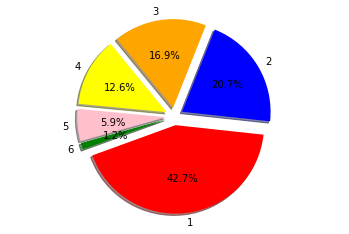

In [34]:
labels = ['1', '2', '3', '4','5','6']
sizes = [tab.iloc[0,0],tab.iloc[1,0], tab.iloc[2,0],tab.iloc[3,0],tab.iloc[4,0],tab.iloc[5,0]]
c = ['red','blue','orange','yellow','pink','green']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 

plt.pie(sizes, explode=explode, labels=labels, colors=c, 
        autopct='%2.1f%%', shadow=True, startangle=200);
plt.axis('equal');
plt.show();

#สร้าง pie chart แสดงค่าต่าง ๆ ของกลุ่ม 6 กลุ่ม โดยจะแยกสีตามกลุ่มแต่ละกลุ่ม 
#เพื่อให้เห็นภาพที่ชัดเจนยิ่งขึ้น


<h2>ข้อที่ 11 ให้แสดงจำนวนสินค้าที่ขายได้รวมในแต่ละวันของสัปดาห์ และ ยอดขายรวมในแต่ละวันของสัปดาห์ฺ โดยนำเสนอข้อมูลทั้งสองนี้ข้าง ๆ กัน โดยเอาเฉพาะปี 2015 ปีเดียว</h2>

In [35]:
#เอา dataset ประกอบด้วย Asales.csv และ items.csv มารวมกัน
a = pd.merge(aSales, items, on='item_id')
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,allsum,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02,999.0,iname22154,37
1,23.01.2013,0,24,22154,999.0,1.0,2013-01-23,999.0,iname22154,37
2,20.01.2013,0,27,22154,999.0,1.0,2013-01-20,999.0,iname22154,37
3,02.01.2013,0,25,22154,999.0,1.0,2013-01-02,999.0,iname22154,37
4,03.01.2013,0,25,22154,999.0,1.0,2013-01-03,999.0,iname22154,37
...,...,...,...,...,...,...,...,...,...,...
2928487,17.10.2015,33,25,8428,249.0,1.0,2015-10-17,249.0,iname8428,40
2928488,01.10.2015,33,25,7903,12198.0,1.0,2015-10-01,12198.0,iname7903,15
2928489,29.10.2015,33,25,7610,2890.0,1.0,2015-10-29,2890.0,iname7610,64
2928490,22.10.2015,33,25,7635,2100.0,1.0,2015-10-22,2100.0,iname7635,64


In [36]:
#สร้างคอลัมใหม่ Salesprice และ week
a['Salesprice'] =a['item_price'] * a['item_cnt_day']
                                                     
#แปลงค่า date จาก String เป็น Date
a['date'] = a['date'].astype('datetime64[ns]')

#กำหนดคอลัม Week เพื่อบอกวันเป็นชื่อวัน
a['week']=a['date'].dt.day_name()
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,allsum,item_name,item_category_id,Salesprice,week
0,2013-02-01,0,59,22154,999.0,1.0,2013-01-02,999.0,iname22154,37,999.0,Friday
1,2013-01-23,0,24,22154,999.0,1.0,2013-01-23,999.0,iname22154,37,999.0,Wednesday
2,2013-01-20,0,27,22154,999.0,1.0,2013-01-20,999.0,iname22154,37,999.0,Sunday
3,2013-02-01,0,25,22154,999.0,1.0,2013-01-02,999.0,iname22154,37,999.0,Friday
4,2013-03-01,0,25,22154,999.0,1.0,2013-01-03,999.0,iname22154,37,999.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,2015-10-17,249.0,iname8428,40,249.0,Saturday
2928488,2015-01-10,33,25,7903,12198.0,1.0,2015-10-01,12198.0,iname7903,15,12198.0,Saturday
2928489,2015-10-29,33,25,7610,2890.0,1.0,2015-10-29,2890.0,iname7610,64,2890.0,Thursday
2928490,2015-10-22,33,25,7635,2100.0,1.0,2015-10-22,2100.0,iname7635,64,2100.0,Thursday


In [37]:
#แปลง date จาก type date เป็น String เพื่อนำไปแยกปี
a['date'] = a['date'].astype(str)
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,allsum,item_name,item_category_id,Salesprice,week
0,2013-02-01,0,59,22154,999.0,1.0,2013-01-02,999.0,iname22154,37,999.0,Friday
1,2013-01-23,0,24,22154,999.0,1.0,2013-01-23,999.0,iname22154,37,999.0,Wednesday
2,2013-01-20,0,27,22154,999.0,1.0,2013-01-20,999.0,iname22154,37,999.0,Sunday
3,2013-02-01,0,25,22154,999.0,1.0,2013-01-02,999.0,iname22154,37,999.0,Friday
4,2013-03-01,0,25,22154,999.0,1.0,2013-01-03,999.0,iname22154,37,999.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,2015-10-17,249.0,iname8428,40,249.0,Saturday
2928488,2015-01-10,33,25,7903,12198.0,1.0,2015-10-01,12198.0,iname7903,15,12198.0,Saturday
2928489,2015-10-29,33,25,7610,2890.0,1.0,2015-10-29,2890.0,iname7610,64,2890.0,Thursday
2928490,2015-10-22,33,25,7635,2100.0,1.0,2015-10-22,2100.0,iname7635,64,2100.0,Thursday


In [38]:
#split ปีออกมา
year = a['date'].map(lambda x: x.split('-')[0])
a['year'] = year
year

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
2928487    2015
2928488    2015
2928489    2015
2928490    2015
2928491    2015
Name: date, Length: 2928492, dtype: object

In [39]:
#สร้างตัวแปรขึ้นมารับค่าปี
year2015 =  a.loc[(a['year'] == '2015')]
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,allsum,item_name,item_category_id,Salesprice,week,year
0,2013-02-01,0,59,22154,999.0,1.0,2013-01-02,999.0,iname22154,37,999.0,Friday,2013
1,2013-01-23,0,24,22154,999.0,1.0,2013-01-23,999.0,iname22154,37,999.0,Wednesday,2013
2,2013-01-20,0,27,22154,999.0,1.0,2013-01-20,999.0,iname22154,37,999.0,Sunday,2013
3,2013-02-01,0,25,22154,999.0,1.0,2013-01-02,999.0,iname22154,37,999.0,Friday,2013
4,2013-03-01,0,25,22154,999.0,1.0,2013-01-03,999.0,iname22154,37,999.0,Friday,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,2015-10-17,249.0,iname8428,40,249.0,Saturday,2015
2928488,2015-01-10,33,25,7903,12198.0,1.0,2015-10-01,12198.0,iname7903,15,12198.0,Saturday,2015
2928489,2015-10-29,33,25,7610,2890.0,1.0,2015-10-29,2890.0,iname7610,64,2890.0,Thursday,2015
2928490,2015-10-22,33,25,7635,2100.0,1.0,2015-10-22,2100.0,iname7635,64,2100.0,Thursday,2015


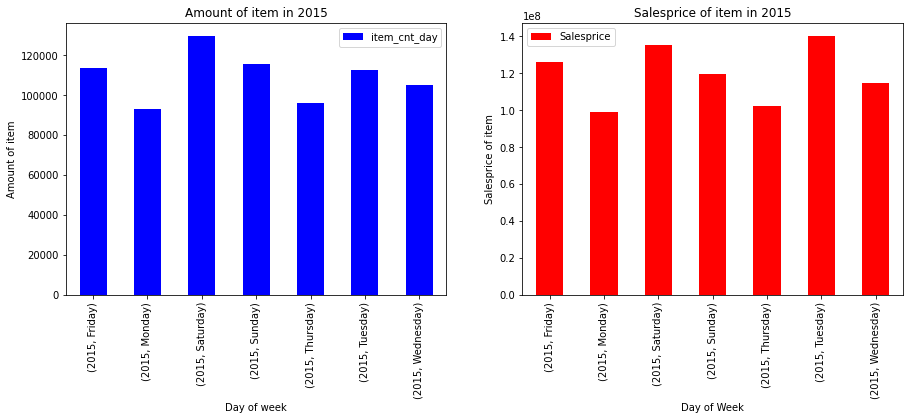

In [40]:
#สร้างกราฟที่แสดงจำนวนสินค้าที่ขายได้และยอดขายรวมในแต่ละวันของสัปดาห์ ในปี 2015
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
item = pd.pivot_table(year2015, 
                      index=['year','week'],
                      values=['item_cnt_day'], 
                      aggfunc=np.sum,
                      fill_value=0).plot(kind='bar',ax =axes[0],color='blue')
Salesprice = pd.pivot_table(year2015, 
                            index=['year','week'],
                            values=['Salesprice'], 
                            aggfunc=np.sum,
                            fill_value=0).plot(kind='bar',ax =axes[1],color='red')

axes[0].set_title('Amount of item in 2015');
axes[1].set_title('Salesprice of item in 2015');
axes[0].set_xlabel('Day of week');
axes[0].set_ylabel('Amount of item');
axes[1].set_xlabel('Day of Week');
axes[1].set_ylabel('Salesprice of item');

<h1>Part 3<h1>

<h2>13. ยอดขายรวมในภาคเหนือและภาคใต้ของพนักงานขายแต่ละคน โดยพิจารณาเฉพราะสินค้าสองตัวคือ 360 และ PS3 และ เฉพาะปี 2018 และ 2019 และให้แสดงผลคอลัมน์จัดกลุ่มเป็น 2 ชั้นตามปีและสินค้า</h2>

กรองข้อมูลมาโดยใช้เฉพาะปี 2018 และ 2019

In [41]:
df = bSales
df = bSales.loc[bSales['Year'].isin([2018,2019])]
df

,Year,Product,Rep,Type,North,South,East,West
36,2019.0,PFour,Ub,Act,0.00,0.04,0.01,0.01
38,2018.0,PFour,ReDe,Sho,0.04,0.12,0.00,0.03
39,2018.0,One,ReDe,Sho,0.04,0.05,0.00,0.01
65,2019.0,3DS,AkGa,Adv,0.04,0.00,0.01,0.01
66,2019.0,PSV,AkGa,Adv,0.03,0.00,0.02,0.01
...,...,...,...,...,...,...,...,...
16491,2019.0,One,TeGa,Act,0.02,0.02,0.00,0.00
16511,2018.0,PSV,NaBaGa,Act,0.00,0.00,0.19,0.00
16512,2018.0,PS3,NaBaGa,Act,0.00,0.00,0.15,0.00
16515,2019.0,3DS,Se,Mis,0.02,0.00,0.00,0.00


กรองข้อมูล Product โดยใช้เพียง PS3 และ 360

In [42]:
df = df.loc[bSales['Product'].isin(['PS3', '360'])]
df

,Year,Product,Rep,Type,North,South,East,West
194,2018.0,PS3,TeKo,Rol,0.00,0.00,0.05,0.00
231,2018.0,PS3,Se,Act,0.00,0.00,0.25,0.00
234,2019.0,PS3,Se,Adv,0.00,0.00,0.12,0.00
318,2018.0,PS3,ArSyWo,Adv,0.01,0.00,0.00,0.00
393,2018.0,PS3,TaIn,Spo,0.21,0.27,0.00,0.09
...,...,...,...,...,...,...,...,...
15971,2018.0,PS3,TeKo,Act,0.00,0.00,0.05,0.00
16386,2019.0,PS3,PQ,Act,0.01,0.01,0.00,0.00
16396,2018.0,PS3,LiOr,Act,0.02,0.07,0.00,0.02
16397,2018.0,360,LiOr,Act,0.02,0.06,0.00,0.01


ลบข้อมูลที่ไม่จำเป็นออกไป(Type, East, West)

In [43]:
df = df.drop(columns=['Type', 'East', 'West'])
df

,Year,Product,Rep,North,South
194,2018.0,PS3,TeKo,0.00,0.00
231,2018.0,PS3,Se,0.00,0.00
234,2019.0,PS3,Se,0.00,0.00
318,2018.0,PS3,ArSyWo,0.01,0.00
393,2018.0,PS3,TaIn,0.21,0.27
...,...,...,...,...,...
15971,2018.0,PS3,TeKo,0.00,0.00
16386,2019.0,PS3,PQ,0.01,0.01
16396,2018.0,PS3,LiOr,0.02,0.07
16397,2018.0,360,LiOr,0.02,0.06


สร้าง pivot talbeเพื่อหาค่า summary ของ North และ South

In [44]:
summary = pd.pivot_table(df,index=["Rep"],columns=["Year","Product"], aggfunc=np.sum, fill_value=" ", margins=True,margins_name= 'total sum')
summary

North                               South                     \
Year      2018.0       2019.0       total sum 2018.0       2019.0         
Product      360   PS3    360   PS3              360   PS3    360   PS3   
Rep                                                                       
5p                 0.0                    0.0          0.0                
Ac          1.89  0.96   0.02  0.01      2.88   0.92  1.52   0.03  0.04   
AlSo                      0.0   0.0       0.0                0.02  0.04   
AqPl               0.0          0.0       0.0          0.0          0.0   
ArSyWo            0.01                   0.01          0.0                
BiIn         0.0  0.04                   0.04   0.08  0.22                
Ca          0.04  0.06          0.0       0.1   0.04  0.08          0.0   
D3                 0.0                    0.0          0.0                
DeSi        0.15                         0.15    0.0                      
DiInSt      0.19  0.14                   0.33   0.21  0.25                
ElAr        1.59  1.11   0.09  0.07      2.86   1.22  2.35   0.14   0.3   
KaCr               0.0                    0.0          0.0                
KoDiEn      0.16  0.29          0.0      0.45   0.16  0.36         0.09   
KoMe        0.21  0.11                   0.32   0.16  0.28                
LiOr        0.02  0.02                   0.04   0.13  0.15                
MiS.         0.0   0.0                    0.0   0.03  0.09                
Mo          0.46  0.25                   0.71   0.38  0.33                
NaBaGa      0.16   0.2          0.0      0.36   0.08  0.39         0.02   
Ni                 0.0                    0.0          0.0                
NiIcSo                         0.01      0.01                      0.02   
PQ                 0.0         0.02      0.02          0.0         0.03   
Se                 0.0          0.0       0.0          0.0          0.0   
SoCoEn             0.3         0.13      0.43         0.01          0.0   
SqEn        0.17  0.01          0.0      0.18   0.19   0.0          0.0   
TaIn        1.04  0.65   0.04  0.03      1.76   0.29  0.46    0.0  0.01   
TeGa        0.04  0.02          0.0      0.06   0.02  0.03         0.01   
TeKo               0.0          0.0       0.0          0.0          0.0   
TrBlEn       0.0   0.0                    0.0   0.03  0.03                
Ub          0.28   0.1                   0.38   0.15  0.14                
Un                              0.0       0.0                       0.0   
WaBrInEn    0.71  0.49   0.21  0.13      1.54   0.68  0.74   0.21  0.24   
total sum   7.11  4.76   0.36   0.4     12.63   4.77  7.43    0.4   0.8   

                     
Year      total sum  
Product              
Rep                  
5p              0.0  
Ac             2.51  
AlSo           0.06  
AqPl            0.0  
ArSyWo          0.0  
BiIn            0.3  
Ca             0.12  
D3              0.0  
DeSi            0.0  
DiInSt         0.46  
ElAr           4.01  
KaCr            0.0  
KoDiEn         0.61  
KoMe           0.44  
LiOr           0.28  
MiS.           0.12  
Mo             0.71  
NaBaGa         0.49  
Ni              0.0  
NiIcSo         0.02  
PQ             0.03  
Se              0.0  
SoCoEn         0.01  
SqEn           0.19  
TaIn           0.76  
TeGa           0.06  
TeKo            0.0  
TrBlEn         0.06  
Ub             0.29  
Un              0.0  
WaBrInEn       1.87  
total sum      13.4